In [32]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [33]:
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
X = pd.DataFrame(X, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])
y["target"].apply(lambda x: "malignant" if x == 1 else "benign")
X["target"] = y["target"]

In [34]:
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


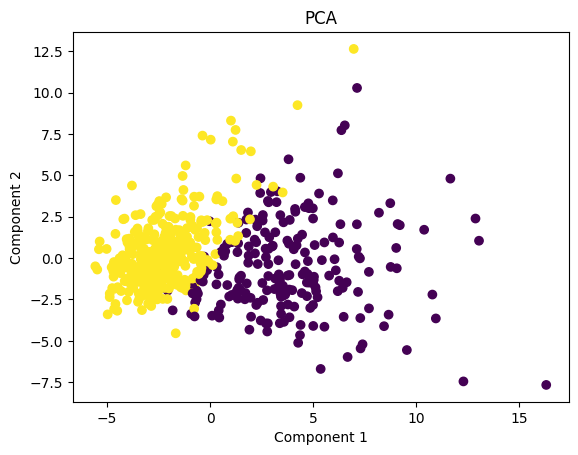

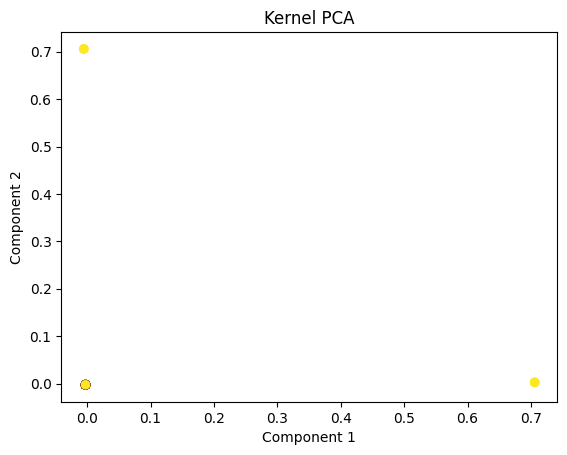

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA


def plot_pca(X,y, title="PCA"):
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y["target"])
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()
pca = PCA(n_components = 30)
X_pca = pca.fit_transform(X)

kpca = KernelPCA(kernel ='rbf', gamma = 15)
X_kpca = kpca.fit_transform(X)

plot_pca(X_pca,y)
plot_pca(X_kpca,y, title="Kernel PCA")

In [45]:
# Explained variance
explained_variance = pca.explained_variance_
total_explained_variance = explained_variance.sum()

# Print results
print(f"Explained Variance:\n{explained_variance}")
print(f"Total Explained Variance: {total_explained_variance:.4f}")



Explained Variance:
[1.34505448e+01 5.70965788e+00 2.82936256e+00 1.98801526e+00
 1.65396892e+00 1.20951382e+00 6.77969851e-01 4.78543277e-01
 4.17628784e-01 3.51323786e-01 2.94501924e-01 2.61648147e-01
 2.44822883e-01 1.59745586e-01 1.00418434e-01 8.00056564e-02
 6.49002454e-02 5.81177953e-02 5.07421427e-02 4.40638844e-02
 3.05954434e-02 2.90541627e-02 2.72758927e-02 2.42849817e-02
 1.73915781e-02 1.54972274e-02 8.05372819e-03 6.87786020e-03
 1.59124334e-03 7.42907144e-04]
Total Explained Variance: 30.2869


In [46]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()

# Print results
print(f"\nExplained Variance Ratio:\n{explained_variance_ratio}")
print(f"Total Explained Variance Ratio: {total_explained_variance_ratio:.4f}")


Explained Variance Ratio:
[4.44103003e-01 1.88518477e-01 9.34184030e-02 6.56392408e-02
 5.46098748e-02 3.99350902e-02 2.23848515e-02 1.58002899e-02
 1.37890472e-02 1.15998237e-02 9.72370944e-03 8.63896071e-03
 8.08343302e-03 5.27439563e-03 3.31556296e-03 2.64158463e-03
 2.14284212e-03 1.91890276e-03 1.67537734e-03 1.45487813e-03
 1.01018424e-03 9.59295041e-04 9.00581059e-04 8.01828737e-04
 5.74225968e-04 5.11679293e-04 2.65913756e-04 2.27089566e-04
 5.25388344e-05 2.45289168e-05]
Total Explained Variance Ratio: 1.0000


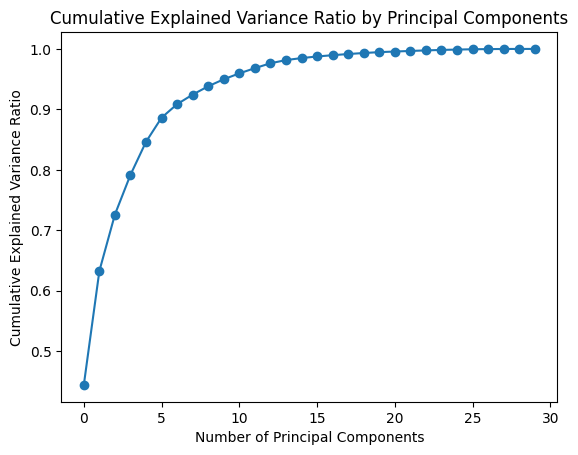

In [49]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Plot explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

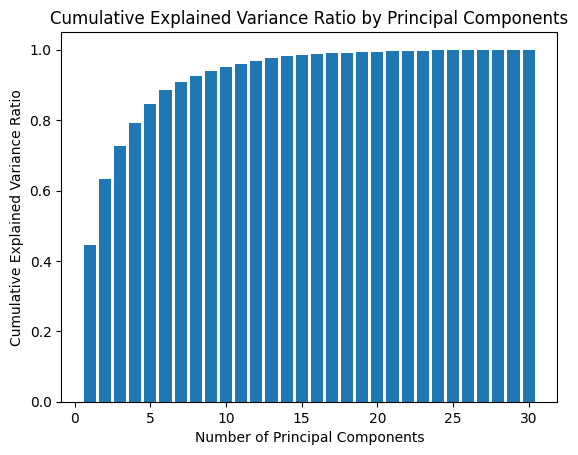

In [50]:
plt.bar(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()